In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the csv file
hr_data = pd.read_csv("HR_comma_sep.csv")
hr_data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [3]:
#looking for any missing values
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


# Analysing each parameter with respect to target 

In [4]:
#Analysing salary of employees
salary_analysis = pd.DataFrame({"Total Employees" : hr_data["salary"].value_counts(),"No. of employees left":hr_data["salary"][hr_data["left"]==1].value_counts()}, index = hr_data["salary"].unique())
salary_analysis["Percentage of people left"] = 100 * (salary_analysis["No. of employees left"]/salary_analysis["Total Employees"])
salary_analysis.reindex(columns = ["Total Employees","No. of employees left","Percentage of people left"])

,Total Employees,No. of employees left,Percentage of people left
low,7316,2172,29.688354
medium,6446,1317,20.431275
high,1237,82,6.628941


In [3]:
#Analysis of departments
hr_data.rename(columns = {"sales":"department"},inplace = True)
department_analysis = pd.DataFrame({"Total No. of Employees":hr_data["department"].value_counts(),"No. of Employees Left":hr_data["department"][hr_data["left"]==1].value_counts()}, index = hr_data["department"].unique())
department_analysis["Percentage of Employees left"]=100 * (department_analysis["No. of Employees Left"]/department_analysis["Total No. of Employees"])
print ("Overall percentage of people left are ", 100 * hr_data["left"].mean())
department_analysis

Overall percentage of people left are  23.8082538836


,No. of Employees Left,Total No. of Employees,Percentage of Employees left
sales,1014,4140,24.492754
accounting,204,767,26.597132
hr,215,739,29.093369
technical,697,2720,25.625000
support,555,2229,24.899058
management,91,630,14.444444
IT,273,1227,22.249389
product_mng,198,902,21.951220
marketing,203,858,23.659674
RandD,121,787,15.374841


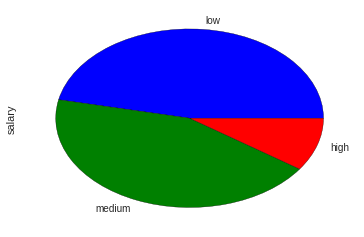

In [6]:
#salaries of people in above departments
#Accounting
hr_data["salary"][hr_data["department"]=="accounting"].value_counts().plot(kind = "pie")

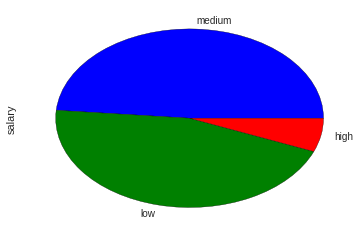

In [7]:
#hr
hr_data["salary"][hr_data["department"]=="hr"].value_counts().plot(kind = "pie")

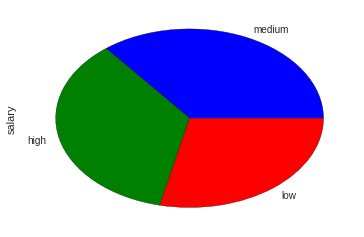

In [8]:
#management
hr_data["salary"][hr_data["department"]=="management"].value_counts().plot(kind = "pie")

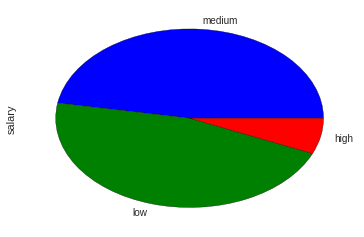

In [9]:
#RandD
hr_data["salary"][hr_data["department"]=="RandD"].value_counts().plot(kind = "pie")

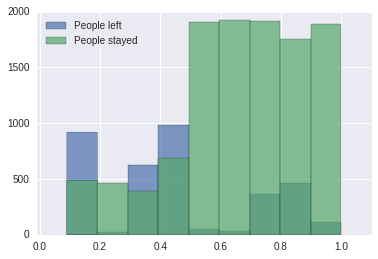

In [10]:
#Analysing satisfaction level of employees
bins = np.linspace(hr_data.satisfaction_level.min(),hr_data.satisfaction_level.max(),10)
plt.hist(hr_data["satisfaction_level"][hr_data["left"]==1],bins = bins, label = "People left", alpha = 0.7)
plt.hist(hr_data["satisfaction_level"][hr_data["left"]==0],bins = bins, label = "People stayed", alpha = 0.7)
plt.legend(loc = "best")
plt.xlim(hr_data.satisfaction_level.min()-0.1,hr_data.satisfaction_level.max()+0.1)
plt.show()

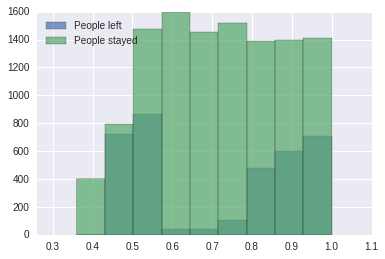

In [11]:
#last evaluation
bins = np.linspace(hr_data.last_evaluation.min(),hr_data.last_evaluation.max(),10)
plt.hist(hr_data["last_evaluation"][hr_data["left"]==1],bins = bins, label = "People left", alpha = 0.7)
plt.hist(hr_data["last_evaluation"][hr_data["left"]==0],bins = bins, label = "People stayed", alpha = 0.7)
plt.legend(loc = "best")
plt.xlim(hr_data.last_evaluation.min()-0.1,hr_data.last_evaluation.max()+0.1)
plt.show()

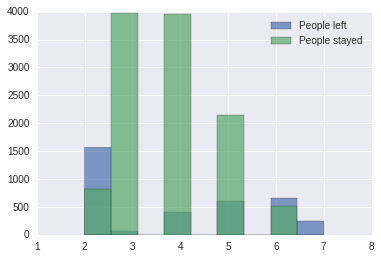

In [12]:
#number_project
bins = np.linspace(hr_data.number_project.min(),hr_data.number_project.max(),10)
plt.hist(hr_data["number_project"][hr_data["left"]==1],bins = bins, label = "People left", alpha = 0.7)
plt.hist(hr_data["number_project"][hr_data["left"]==0],bins = bins, label = "People stayed", alpha = 0.7)
plt.legend(loc = "best")
plt.xlim(hr_data.number_project.min()-1,hr_data.number_project.max()+1)
plt.show()

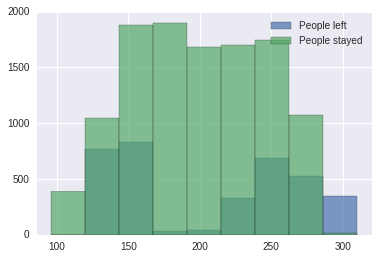

In [13]:
#average_montly_hours
bins = np.linspace(hr_data.average_montly_hours.min(),hr_data.average_montly_hours.max(),10)
plt.hist(hr_data["average_montly_hours"][hr_data["left"]==1],bins = bins, label = "People left", alpha = 0.7)
plt.hist(hr_data["average_montly_hours"][hr_data["left"]==0],bins = bins, label = "People stayed", alpha = 0.7)
plt.legend(loc = "best")
plt.xlim(hr_data.average_montly_hours.min()-10,hr_data.average_montly_hours.max()+10)
plt.show()

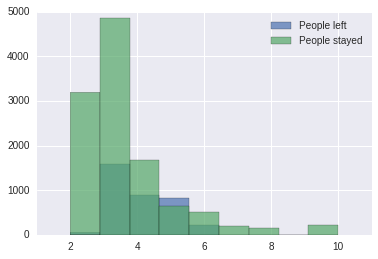

In [14]:
#time_spend_company
bins = np.linspace(hr_data.time_spend_company.min(),hr_data.time_spend_company.max(),10)
plt.hist(hr_data["time_spend_company"][hr_data["left"]==1],bins = bins, label = "People left", alpha = 0.7)
plt.hist(hr_data["time_spend_company"][hr_data["left"]==0],bins = bins, label = "People stayed", alpha = 0.7)
plt.legend(loc = "best")
plt.xlim(hr_data.time_spend_company.min()-1,hr_data.time_spend_company.max()+1)
plt.show()

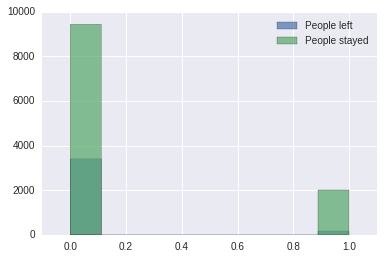

In [15]:
#Work_accident
bins = np.linspace(hr_data.Work_accident.min(),hr_data.Work_accident.max(),10)
plt.hist(hr_data["Work_accident"][hr_data["left"]==1],bins = bins, label = "People left", alpha = 0.7)
plt.hist(hr_data["Work_accident"][hr_data["left"]==0],bins = bins, label = "People stayed", alpha = 0.7)
plt.legend(loc = "best")
plt.xlim(hr_data.Work_accident.min()-0.1,hr_data.Work_accident.max()+0.1)
plt.show()

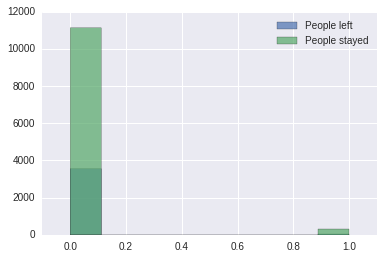

In [16]:
#promotion_last_5years
bins = np.linspace(hr_data.promotion_last_5years.min(),hr_data.promotion_last_5years.max(),10)
plt.hist(hr_data["promotion_last_5years"][hr_data["left"]==1],bins = bins, label = "People left", alpha = 0.7)
plt.hist(hr_data["promotion_last_5years"][hr_data["left"]==0],bins = bins, label = "People stayed", alpha = 0.7)
plt.legend(loc = "best")
plt.xlim(hr_data.promotion_last_5years.min()-0.1,hr_data.promotion_last_5years.max()+0.1)
plt.show()

In [17]:
not_promoted, promoted = hr_data["promotion_last_5years"].value_counts()
percentage_employees_promoted = 100 * (promoted/(not_promoted + promoted))
percentage_employees_promoted

2.1268084538969263

In [18]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

# Applying various Classification models

In [4]:
X = hr_data.drop("left", axis = 1)
y = hr_data["left"]

In [5]:
#Replacing strings with values for calculations
salary_dummies = pd.get_dummies(hr_data["salary"])
X["high_salary"] = salary_dummies["high"]
X["low_salary"] = salary_dummies["low"]
X.drop("salary", axis = 1, inplace = True)
department_dummies = pd.get_dummies(hr_data["department"])
X["hr"] = department_dummies["hr"]
X["management"] = department_dummies["management"]
X["accounting"] = department_dummies["accounting"]
X["RandD"] = department_dummies["RandD"]
X.drop("department", axis = 1, inplace = True)
X.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high_salary,low_salary,hr,management,accounting,RandD
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0


In [6]:
#Splitting data into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [7]:
#Standardising values to mean = 0, standard deviation = 1
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)
X_std = std.transform(X)

In [8]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits = 20, test_size = 0.2)

# Applying Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [25]:
from sklearn.model_selection import GridSearchCV
parameters = {"C":[0.01,0.1,1,10,100], "penalty":["l1","l2"]}
log_reg = GridSearchCV(classifier,param_grid = parameters, cv = cv)
log_reg.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=None, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [26]:
log_reg.best_params_

{'C': 100, 'penalty': 'l1'}

In [27]:
log_reg.best_score_

0.7874523809523809

In [28]:
log_reg_best = log_reg.best_estimator_
log_reg_best.score(X_test,y_test)

0.79466666666666663

In [29]:
log_reg_coef = pd.DataFrame({"Features":np.array(X.columns).reshape(13,),"Coefficients":log_reg_best.coef_.reshape(13,)})
log_reg_coef = log_reg_coef.reindex(columns = ["Features","Coefficients"])
log_reg_coef.sort_values(by = "Coefficients", ascending = False)

,Features,Coefficients
4,time_spend_company,0.400503
8,low_salary,0.266895
3,average_montly_hours,0.228525
1,last_evaluation,0.109392
9,hr,0.056957
11,accounting,-0.000677
10,management,-0.073431
12,RandD,-0.137579
6,promotion_last_5years,-0.202911
2,number_project,-0.379716


# Applying KNearest Neighbors Classifier

In [30]:
score_uniform = {}
for i in range(1,20):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    score_uniform[i] = knn.score(X_test,y_test)

In [31]:
score_distance = {}
for i in range(1,20):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = i, weights = "distance")
    knn.fit(X_train,y_train)
    score_distance[i] = knn.score(X_test,y_test)

In [32]:
KNN = pd.DataFrame({"score_distance":score_distance,"score_uniform":score_uniform}, index = range(1,20))
KNN.index.name = "No. of Neighbors"
best_distance, best_uniform = KNN["score_distance"].max(),KNN["score_uniform"].max()
KNN

,score_distance,score_uniform
No. of Neighbors,,
1,0.968222,0.968222
2,0.968222,0.966889
3,0.970667,0.961111
4,0.971778,0.960000
5,0.972444,0.954444
6,0.972889,0.957333
7,0.970667,0.952667
8,0.970889,0.953556
9,0.971333,0.951111


In [33]:
best_distance, best_uniform

(0.97288888888888891, 0.96822222222222221)

In [34]:
KNN_best = KNeighborsClassifier(n_neighbors = 6, weights = "distance")
KNN_best.fit(X_train,y_train)
y_pred = KNN_best.predict(X_std)

In [35]:
knn_pred = pd.DataFrame({"y":y,"y_pred":y_pred})
index = []
for i in range(len(y)):
    if knn_pred.y[i] == 0 & knn_pred.y_pred[i]==1:
        index.append(i)
index

[]

# Applying RandomForestClassifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [10]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":range(10,100)}
RFC = GridSearchCV(rfc, param_grid = parameters, cv = cv)
RFC.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=None, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(10, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [11]:
RFC.best_params_

{'n_estimators': 95}

In [12]:
RFC.best_score_

0.98869047619047623

In [13]:
RFC_best = RFC.best_estimator_

In [14]:
RFC_best.fit(X_train,y_train)
RFC_best.score(X_test,y_test)

0.98977777777777776

In [15]:
y_pred = RFC_best.predict(X_std)

In [16]:
RFC_pred = pd.DataFrame({"y":y,"y_pred":y_pred})
index = []
for i in range(len(y)):
    if RFC_pred.y[i] == 0 & RFC_pred.y_pred[i]==1:
        index.append(i)
index

[]

In [17]:
RFC_scores = pd.DataFrame({"Feature_scores":RFC_best.feature_importances_,"Features":np.array(X.columns)})
RFC_scores.sort_values(by = "Feature_scores", ascending = False, inplace = True)
RFC_scores.reindex(columns = ["Features","Feature_scores"])

,Features,Feature_scores
0,satisfaction_level,0.290016
2,number_project,0.197996
4,time_spend_company,0.182798
3,average_montly_hours,0.165284
1,last_evaluation,0.132200
8,low_salary,0.008826
5,Work_accident,0.008594
7,high_salary,0.004944
11,accounting,0.002082
12,RandD,0.002077


In [18]:
RFC_scores["Feature_scores"][:5].sum()

0.96829445099824341

In [19]:
y_pred_rfc = RFC_best.predict_proba(X_std[y==0])

In [23]:
leave_next = pd.DataFrame({'Class_0_prob':y_pred_rfc[:,0],"Class_1_prob":y_pred_rfc[:,1]})
leave_next.sort_values(by = "Class_0_prob", ascending = False)

,Class_0_prob,Class_1_prob
0,1.000000,0.000000
7024,1.000000,0.000000
7015,1.000000,0.000000
7016,1.000000,0.000000
7017,1.000000,0.000000
7018,1.000000,0.000000
7019,1.000000,0.000000
7022,1.000000,0.000000
7025,1.000000,0.000000
7008,1.000000,0.000000


# Subset of X with Selective Features

In [24]:
X_sub = X[RFC_scores["Features"][:5]]
y_sub = y

In [25]:
from sklearn.model_selection import train_test_split
X_sub_train,X_sub_test,y_train,y_test = train_test_split(X_sub,y,test_size = 0.3, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_sub_train = std.fit_transform(X_sub_train)
X_sub_test = std.transform(X_sub_test)
X_sub_std = std.transform(X_sub)

In [27]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits = 20, test_size = 0.2)

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg_1 = LogisticRegression()

In [29]:
from sklearn.model_selection import GridSearchCV
parameters = {"C":[0.01,0.1,1,10,100],"penalty":["l1","l2"]}
LR = GridSearchCV(log_reg_1, param_grid = parameters, cv = cv)
LR.fit(X_sub_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=None, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [30]:
LR.best_score_

0.77109523809523806

In [31]:
LR.best_params_

{'C': 0.01, 'penalty': 'l1'}

In [32]:
LR_best = LR.best_estimator_
LR_best.fit(X_sub_train,y_train)
LR_best.score(X_sub_test,y_test)

0.77133333333333332

# KNN Classifier

In [33]:
score_uniform = {}
for i in range(1,20):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_sub_train,y_train)
    score_uniform[i] = knn.score(X_sub_test,y_test)

In [34]:
score_distance = {}
for i in range(1,20):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = i, weights = "distance")
    knn.fit(X_sub_train,y_train)
    score_distance[i] = knn.score(X_sub_test,y_test)

In [35]:
KNN = pd.DataFrame({"score_distance":score_distance,"score_uniform":score_uniform}, index = range(1,20))
KNN.index.name = "No. of Neighbors"
best_distance, best_uniform = KNN["score_distance"].max(),KNN["score_uniform"].max()
KNN

,score_distance,score_uniform
No. of Neighbors,,
1,0.977778,0.977778
2,0.977778,0.974000
3,0.976889,0.969333
4,0.979333,0.969556
5,0.981333,0.966667
6,0.981556,0.969111
7,0.981333,0.967333
8,0.982222,0.968889
9,0.981778,0.967111


In [36]:
best_distance, best_uniform

(0.98244444444444445, 0.97777777777777775)

In [37]:
KNN_best = KNeighborsClassifier(n_neighbors = 12, weights = "distance")
KNN_best.fit(X_sub_train,y_train)
KNN_best.score(X_sub_test,y_test)

0.98244444444444445

# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [39]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":range(10,100)}
RFC = GridSearchCV(rfc, param_grid = parameters, cv = cv)
RFC.fit(X_sub_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=None, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(10, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [40]:
RFC.best_score_

0.98859523809523808

In [41]:
RFC_best = RFC.best_estimator_
RFC_best.fit(X_sub_train,y_train)
RFC_best.score(X_sub_test,y_test)

0.99044444444444446

## Applying PCA

In [42]:
eigen_values,eigen_vectors = np.linalg.eig(np.cov(X_std.T))

In [43]:
eigen = {}
for i in range(13):
    eigen[i] = eigen_vectors.T[:,i]

In [44]:
pca = pd.DataFrame(eigen)

In [45]:
pca["eigen_values"] = eigen_values
pca.sort_values(by = "eigen_values", ascending = False, inplace = True)
pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,eigen_values
0,-0.084027,0.504792,0.568201,0.544747,0.330988,-0.015862,0.028132,0.020625,-0.026704,-0.040544,0.070728,0.008616,-0.008177,1.837186
1,-0.095770,0.066432,0.072509,0.076996,-0.168651,-0.071674,-0.351036,-0.587376,0.507870,0.046317,-0.460223,0.023071,0.031575,1.494711
5,0.742200,0.321358,-0.070063,0.124769,-0.345310,0.303697,0.015536,-0.001586,-0.086132,-0.013279,-0.120948,-0.211347,0.216300,1.146283
10,-0.158672,-0.121062,0.009413,-0.079247,0.245311,0.314084,0.414405,-0.249601,0.295540,-0.133004,0.184975,-0.489082,0.427187,1.066792
12,-0.029885,0.021492,0.000919,0.031881,-0.019737,-0.246157,-0.082818,0.023476,-0.061987,0.693146,0.049336,-0.634024,-0.201298,1.036743
11,-0.221754,-0.081189,0.094935,0.045234,-0.149106,-0.323362,-0.282469,0.208046,-0.322278,-0.141020,-0.219151,-0.174990,0.693476,1.016402
9,0.253754,0.106702,-0.099465,-0.036922,-0.001661,-0.604600,-0.121127,-0.028076,0.273458,-0.476949,0.397326,-0.240386,-0.118533,0.960245
8,-0.118631,-0.075343,0.040848,-0.028992,0.072773,0.511859,-0.694080,0.174477,0.008715,-0.229912,0.175158,-0.280680,-0.189369,0.943429
6,-0.334554,-0.076037,0.191420,0.248871,-0.772793,0.076929,0.256879,0.114623,0.090721,-0.157142,0.124236,-0.117127,-0.198453,0.843466
7,0.005278,0.073494,-0.010131,0.022663,-0.156589,0.042118,-0.207262,0.129736,0.376383,0.413407,0.557125,0.356010,0.397707,0.798407


In [46]:
pca["%_explained_variance"] = 100 * (pca["eigen_values"]/pca["eigen_values"].sum())
pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,eigen_values,%_explained_variance
0,-0.084027,0.504792,0.568201,0.544747,0.330988,-0.015862,0.028132,0.020625,-0.026704,-0.040544,0.070728,0.008616,-0.008177,1.837186,14.140400
1,-0.095770,0.066432,0.072509,0.076996,-0.168651,-0.071674,-0.351036,-0.587376,0.507870,0.046317,-0.460223,0.023071,0.031575,1.494711,11.504447
5,0.742200,0.321358,-0.070063,0.124769,-0.345310,0.303697,0.015536,-0.001586,-0.086132,-0.013279,-0.120948,-0.211347,0.216300,1.146283,8.822679
10,-0.158672,-0.121062,0.009413,-0.079247,0.245311,0.314084,0.414405,-0.249601,0.295540,-0.133004,0.184975,-0.489082,0.427187,1.066792,8.210856
12,-0.029885,0.021492,0.000919,0.031881,-0.019737,-0.246157,-0.082818,0.023476,-0.061987,0.693146,0.049336,-0.634024,-0.201298,1.036743,7.979569
11,-0.221754,-0.081189,0.094935,0.045234,-0.149106,-0.323362,-0.282469,0.208046,-0.322278,-0.141020,-0.219151,-0.174990,0.693476,1.016402,7.823012
9,0.253754,0.106702,-0.099465,-0.036922,-0.001661,-0.604600,-0.121127,-0.028076,0.273458,-0.476949,0.397326,-0.240386,-0.118533,0.960245,7.390786
8,-0.118631,-0.075343,0.040848,-0.028992,0.072773,0.511859,-0.694080,0.174477,0.008715,-0.229912,0.175158,-0.280680,-0.189369,0.943429,7.261354
6,-0.334554,-0.076037,0.191420,0.248871,-0.772793,0.076929,0.256879,0.114623,0.090721,-0.157142,0.124236,-0.117127,-0.198453,0.843466,6.491967
7,0.005278,0.073494,-0.010131,0.022663,-0.156589,0.042118,-0.207262,0.129736,0.376383,0.413407,0.557125,0.356010,0.397707,0.798407,6.145156


In [47]:
pca["%_explained_variance"].sum()

100.0

In [48]:
for i in range(14):
    print (pca["%_explained_variance"][:i].sum())

0
14.1403998652
25.644847061
34.4675261933
42.6783817738
50.6579511009
58.4809634624
65.8717497747
73.1331032796
79.625070763
85.7702266043
90.9211603028
95.8096301675
100.0


# Conclusion :